# **1. Perkenalan Dataset**


Dataset yang digunakan pada penelitian ini adalah Diabetes Prediction Dataset yang diperoleh dari platform Kaggle. Dataset ini berisi kumpulan data medis dan demografis pasien, disertai dengan label status diabetes (positif atau negatif). Tujuan utama dari dataset ini adalah untuk membantu membangun model machine learning yang mampu memprediksi risiko diabetes berdasarkan riwayat kesehatan dan karakteristik individu.

Fitur-fitur yang tersedia dalam dataset mencakup usia, jenis kelamin, indeks massa tubuh (Body Mass Index/BMI), riwayat hipertensi, penyakit jantung, kebiasaan merokok, kadar HbA1c, serta kadar glukosa darah. Kombinasi variabel medis dan demografis tersebut menjadikan dataset ini relevan untuk analisis risiko diabetes secara komprehensif. Dataset ini tidak hanya bermanfaat bagi tenaga kesehatan dalam mengidentifikasi pasien berisiko, tetapi juga dapat digunakan oleh peneliti untuk mengkaji hubungan antara faktor kesehatan dan kemungkinan terjadinya diabetes.

Adapun penjelasan singkat setiap atribut pada dataset adalah sebagai berikut:

- Age (Usia)
Usia merupakan salah satu faktor penting dalam risiko diabetes. Seiring bertambahnya usia, kemungkinan seseorang mengalami diabetes cenderung meningkat akibat penurunan aktivitas fisik, perubahan hormon, serta munculnya penyakit penyerta lainnya.

- Gender (Jenis Kelamin)
Jenis kelamin dapat memengaruhi risiko diabetes, meskipun dampaknya bervariasi. Sebagai contoh, wanita dengan riwayat diabetes gestasional memiliki risiko lebih tinggi mengalami diabetes tipe 2 di kemudian hari. Beberapa studi juga menunjukkan bahwa pria memiliki risiko sedikit lebih tinggi dibandingkan wanita.

- Body Mass Index (BMI)
BMI digunakan untuk mengukur status berat badan berdasarkan tinggi dan berat badan seseorang. Nilai BMI yang tinggi berkaitan erat dengan peningkatan risiko diabetes tipe 2 karena kelebihan lemak tubuh dapat menyebabkan resistensi insulin.

- Hypertension (Hipertensi)
Hipertensi sering ditemukan bersamaan dengan diabetes dan memiliki faktor risiko yang serupa. Tekanan darah tinggi dapat meningkatkan risiko diabetes, begitu pula sebaliknya, dan keduanya berdampak negatif terhadap kesehatan kardiovaskular.

- Heart Disease (Penyakit Jantung)
Riwayat penyakit jantung berkaitan dengan meningkatnya risiko diabetes. Hubungan antara keduanya bersifat dua arah karena memiliki faktor risiko yang sama, seperti obesitas dan tekanan darah tinggi.

- Smoking History (Riwayat Merokok)
Merokok merupakan faktor risiko yang dapat dimodifikasi. Kebiasaan merokok dapat meningkatkan resistensi insulin dan mengganggu metabolisme glukosa, sehingga meningkatkan kemungkinan seseorang terkena diabetes.

- HbA1c Level
HbA1c menunjukkan rata-rata kadar glukosa darah dalam 2–3 bulan terakhir. Nilai HbA1c yang tinggi menandakan kontrol gula darah yang buruk dan berhubungan dengan peningkatan risiko diabetes serta komplikasinya.

- Blood Glucose Level (Kadar Glukosa Darah)
Kadar glukosa darah mencerminkan jumlah gula dalam darah pada waktu tertentu. Nilai yang tinggi, baik saat puasa maupun setelah makan, dapat menjadi indikator gangguan regulasi glukosa dan risiko diabetes.

Dataset Link: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [3]:
import kagglehub
import os
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [4]:
dataset_path = "diabetes_prediction_dataset.csv"
df = pd.read_csv(dataset_path)

print("Dataset berhasil dimuat!")

Dataset berhasil dimuat!


In [5]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [7]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [8]:
# Check value counts
df['smoking_history'].value_counts()
df['gender'].value_counts()
df['diabetes'].value_counts()

,count
diabetes,
0,91500
1,8500


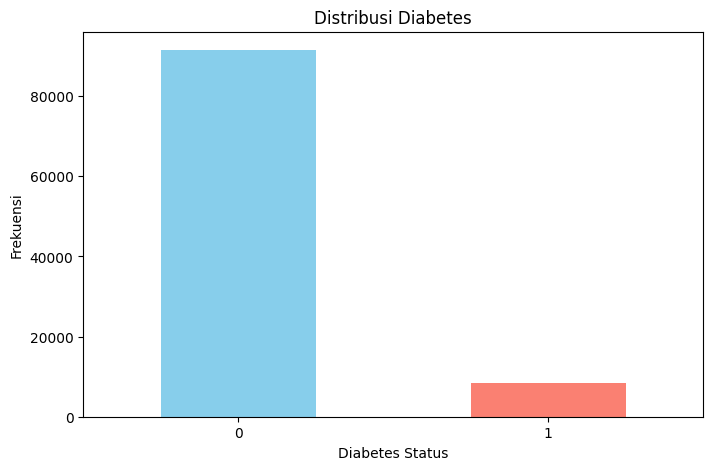

In [9]:
# Visualisasi distribusi target
plt.figure(figsize=(8, 5))
df['diabetes'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribusi Diabetes')
plt.xlabel('Diabetes Status')
plt.ylabel('Frekuensi')
plt.xticks(rotation=0)
plt.show()

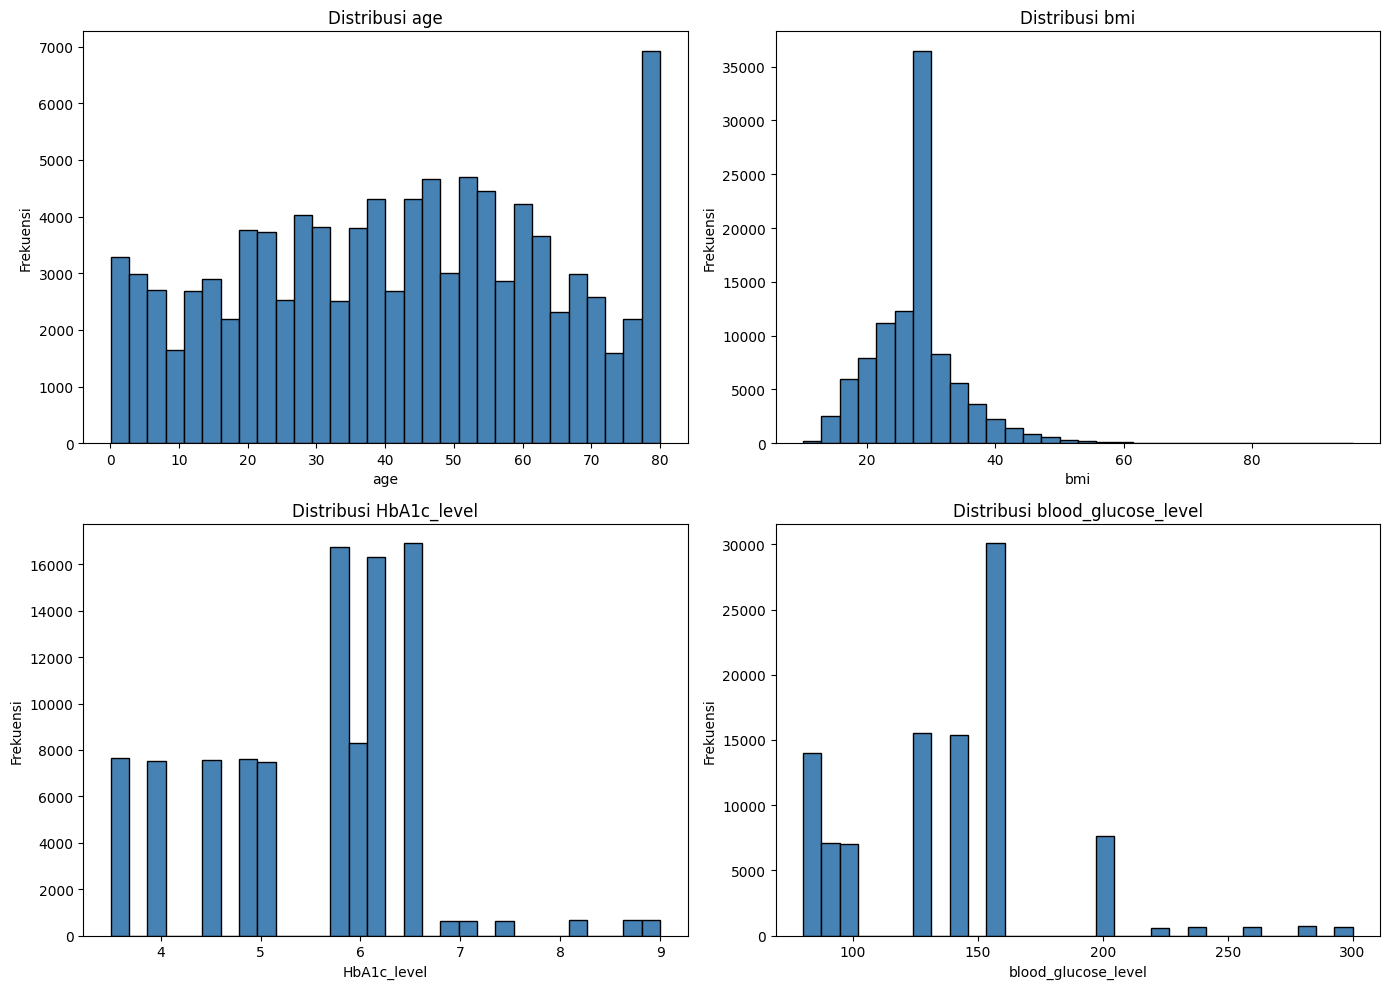

In [10]:
# Histogram untuk numerical features
numerical_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    axes[idx].hist(df[col], bins=30, edgecolor='black', color='steelblue')
    axes[idx].set_title(f'Distribusi {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frekuensi')

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [11]:
# Handle duplicates
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (3854, 9)


In [12]:
df = df.drop_duplicates()

In [13]:
# Checking null values
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [14]:
# Remove unnecessary value
df = df[df['gender'] != 'Other']

In [15]:
# Define function to remap smoking categories
def remap_smoking_status(status):
    if status in ['never', 'No Info']:
        return 'non-smoker'
    elif status == 'current':
        return 'current'
    elif status in ['ever', 'former', 'not current']:
        return 'past_smoker'

In [16]:
# Apply remapping to smoking_history column
df['smoking_history'] = df['smoking_history'].apply(remap_smoking_status)
print(df['smoking_history'].value_counts())

smoking_history
non-smoker     67276
past_smoker    19655
current         9197
Name: count, dtype: int64


In [17]:
# Split data into features and target variable
X = df.drop('diabetes', axis=1)
y = df['diabetes']

In [18]:
# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level','hypertension','heart_disease']),
        ('cat', OneHotEncoder(), ['gender','smoking_history'])
    ])

In [19]:
df_encoded = df.copy()

def apply_one_hot_encoding(dataframe, column_name):
    dummies = pd.get_dummies(dataframe[column_name], prefix=column_name)
    dataframe = pd.concat([dataframe.drop(column_name, axis=1), dummies], axis=1)
    return dataframe

df_encoded = apply_one_hot_encoding(df_encoded, 'gender')
df_encoded = apply_one_hot_encoding(df_encoded, 'smoking_history')

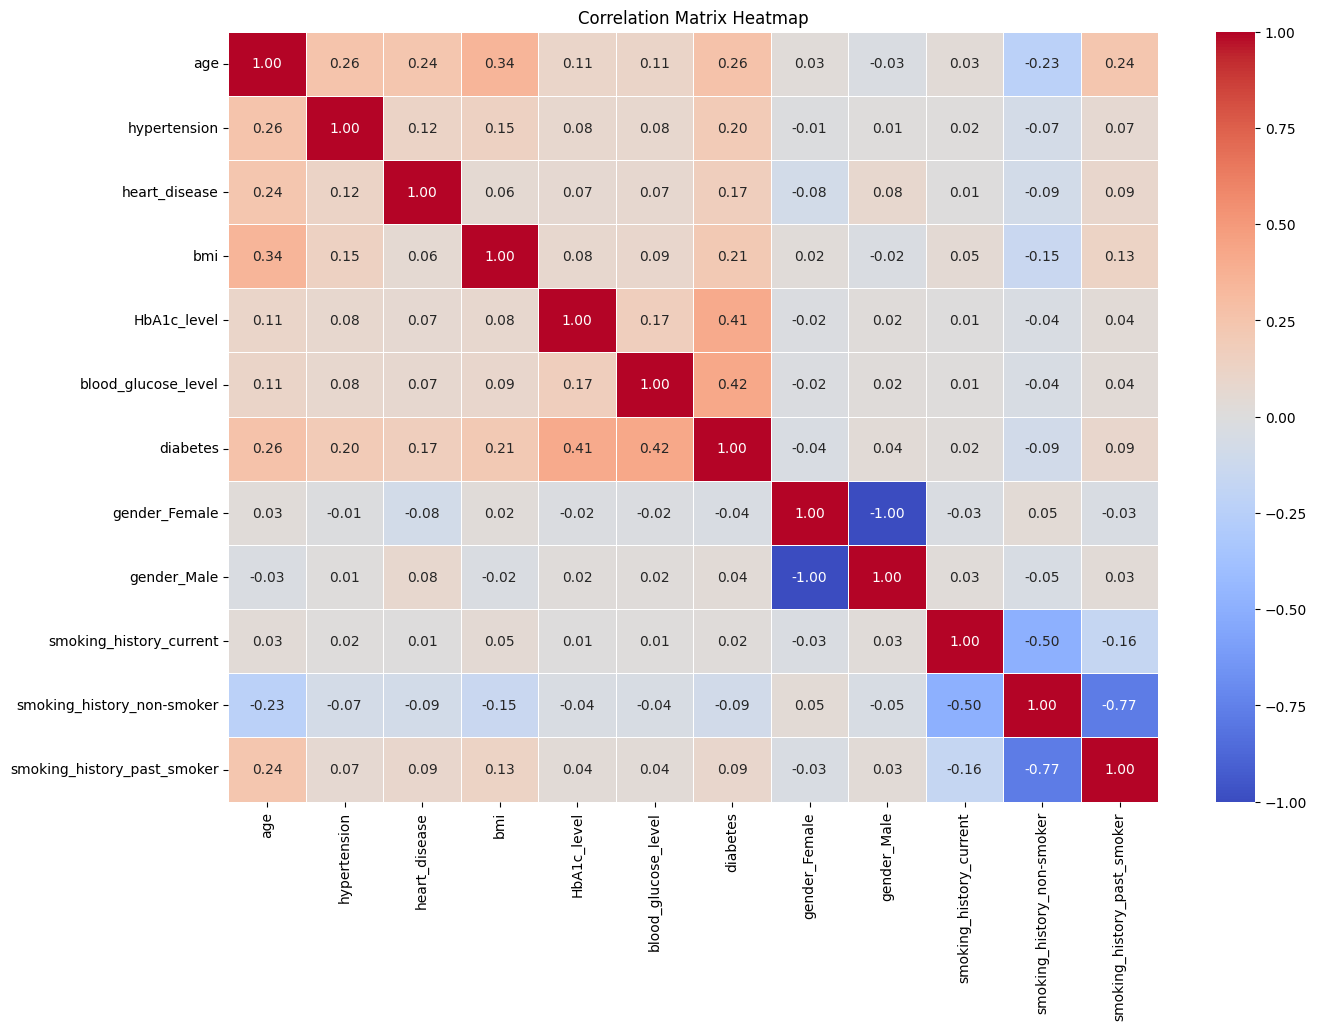

In [20]:
# Correlation analysis
correlation_matrix = df_encoded.corr()

# Heatmap I: Full correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

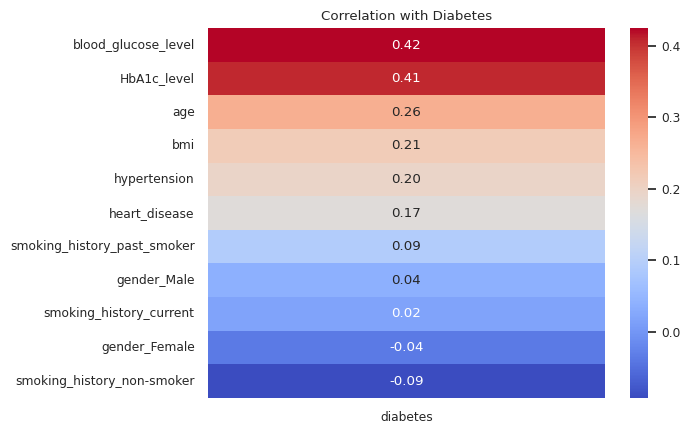

In [21]:
# Heatmap II: Correlation with target variable
corr = df_encoded.corr()
target_corr = corr['diabetes'].drop('diabetes')
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

In [22]:
# SAVE PROCESSED DATASET

output_path = 'diabetes_dataset_processed.csv'
df.to_csv(output_path, index=False)
print(f"✓ Full processed dataset saved to: {output_path}")

✓ Full processed dataset saved to: diabetes_dataset_processed.csv
